# `RandomForest` Classifier

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,15)})

### New Dataset

Because `RandomForest` randomizes the features it uses, it would make sense to demonstrate with more than 2 features right?

In [2]:
digits = datasets.load_digits()

X = digits['data']
y = digits['target']

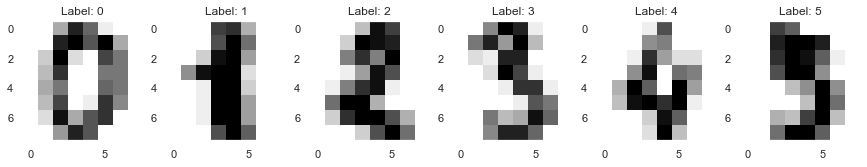

In [3]:
for i in np.arange(0, 6):
    plt.subplot(1, 6, (i+1))
    image = X[i].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.grid(visible=False)
    plt.title(f"Label: {y[i]}")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25, random_state=32
)

Let's start by trying a decision tree with no hyperparameters on the new dataset. Because we have 64 features per digit, we can't really show it on a nice 2D graph anymore. But we can still check the accuracy.

Train accuracy: 1.0, Test accuracy: 0.88


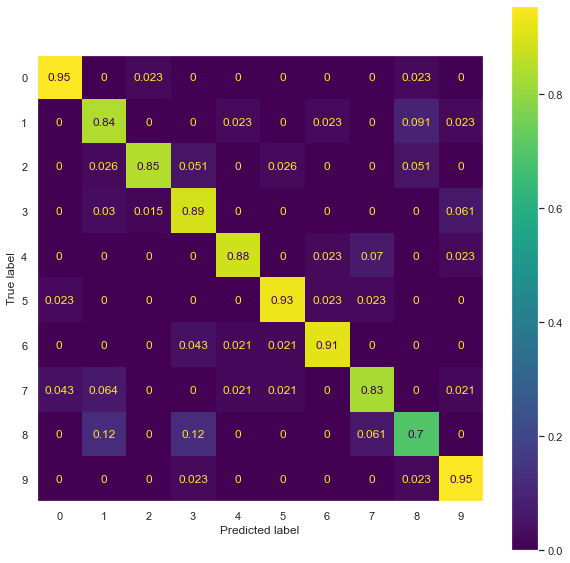

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(f"Train accuracy: {round(model.score(X_train, y_train), 2)}, Test accuracy: {round(model.score(X_test, y_test), 2)}")

# Display confusion matrix
sns.set(rc={'figure.figsize':(10,10)})
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), normalize='true')
plt.grid(visible=False)

## Random Forest

Also an ensemble method, but this time we randomize datapoints ( bagging) and the features. In this case, picking a sample of features means we pick a small subset of pixels. By default, `sklearn` uses $\sqrt{n}$ where $n$ is the number of features. In this case we have 64 features total, so $\sqrt{64}$ or 8 pixels per tree.

Train accuracy: 1.0, Test accuracy: 0.98


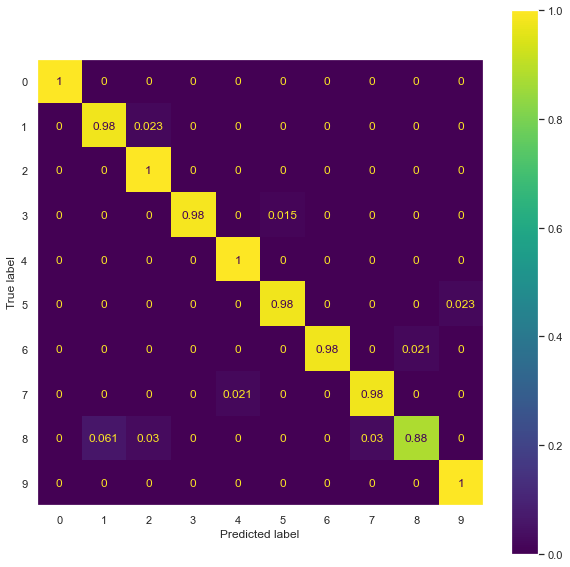

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(f"Train accuracy: {round(model.score(X_train, y_train), 2)}, Test accuracy: {round(model.score(X_test, y_test), 2)}")

# Display confusion matrix
sns.set(rc={'figure.figsize':(10,10)})
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), normalize='true')
plt.grid(visible=False)

Look at the improvement with no hyperparameter optimization! This looks pretty good but we could further tweak the number of trees grown (`n_estimators`), the number of features used (`max_features`), and the number of datapoints drawn with replacement for each tree (`max_samples`). We can futher set the same hyperparameters we used in `DecisionTreeClassifier` such as `max_depth`, `max_leaf_nodes`, `min_impurity_decrease` in order to prune each tree.